## OBJECTIVE STATEMENT
This project aims to analyze the New York City Airbnb market to uncover factors influencing rental prices and occupancy rates. It seeks to provide actionable insights for potential hosts and guests by identifying the characteristics of high-demand properties and understanding pricing strategies across neighborhoods and boroughs.

specific goals includes: 
average price, per night, of an Airbnb listing in NYC
Number of listings by Room type
Number of listings by Neighnoorhoods

In [160]:
import pandas as pd
import numpy as np

## Data Collection 
Within this project i will read in the NYC Airbnb listing Data from Kaggle(https://www.kaggle.com/datasets/ebrahimelgazar/new-york-city-airbnb-market)
The Dataframe consists of important features such as:
Location: Borough, neighbourhood, latitude, longtitude.
Property Features: Room type, Number of Reviews, Price, Minimum Nights, availability_365
Hose Data: Host ID, Host name, Reviews per month

In [161]:
airbnb = pd.read_csv('Airbnb.csv',encoding='ISO-8859-1',low_memory=False)
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Data Cleaning
1. Change any date columns to datatime format(last_review is showed as an object dtype so we convert it to datetime format)
2. check for missing values, drop unuseful columns 

In [162]:
airbnb.info() #last review consists of date but its type is an int64 which needs to change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [163]:
#convert last_review to a datetime
airbnb['last_review']= pd.to_datetime(airbnb['last_review'])

In [164]:
#Handling missing values
airbnb.dropna(inplace=True) # drop rows with missing values
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  number_

In [165]:
# Check for zero values in the entire DataFrame
zero_values_df = (airbnb == 0).sum()

# Print the count of zero values in each column
print(zero_values_df)


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                10
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  12675
dtype: int64


In [166]:
# Fill 0 values with the mean of avalilability_365
airbnb['availability_365'] = airbnb['availability_365'].replace(0, mean_value)

# Convert the column to int64 type
airbnb['availability_365'] = airbnb['availability_365'].astype('int64')

In [167]:
# Calculate the median of the 'price' column, excluding 0 values
median_value = airbnb.loc[airbnb['price'] != 0, 'price'].median()

# Fill 0 values in 'price' with the calculated median
airbnb['price'] = airbnb['price'].replace(0, median_value)

In [168]:
zero_counts = (airbnb == 0).sum()

# Print the columns that contain zero values along with the count of zero values
print(zero_counts)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## Data Visualization

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution analysis:
What is the average price, per night, of an Airbnb listing in NYC?


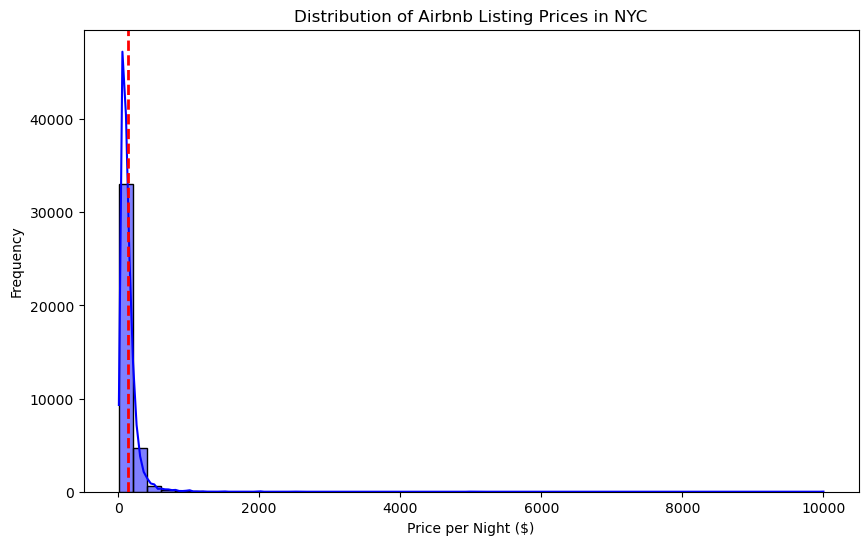

In [170]:
# Histogram of the price per night
average_price_per_night = airbnb['price'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(airbnb['price'], kde=True, bins=50, color='blue')
plt.axvline(average_price_per_night, color='red', linestyle='dashed', linewidth=2, label=f'Average Price: ${average_price_per_night:.2f}')
plt.title('Distribution of Airbnb Listing Prices in NYC')
plt.xlabel('Price per Night ($)')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

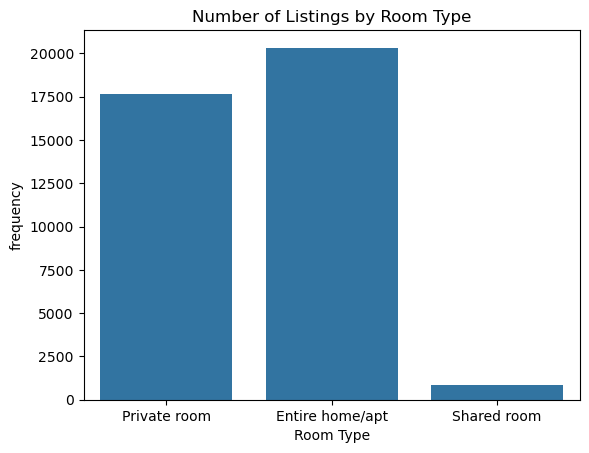

In [183]:
sns.countplot(x='room_type', data = airbnb)
plt.xlabel('Room Type')
plt.ylabel('frequency')
plt.title('Number of Listings by Room Type')
plt.show

The plot above shows the most listed room type within NYC, which is Entir home/apt(having the most commonly listed type.)

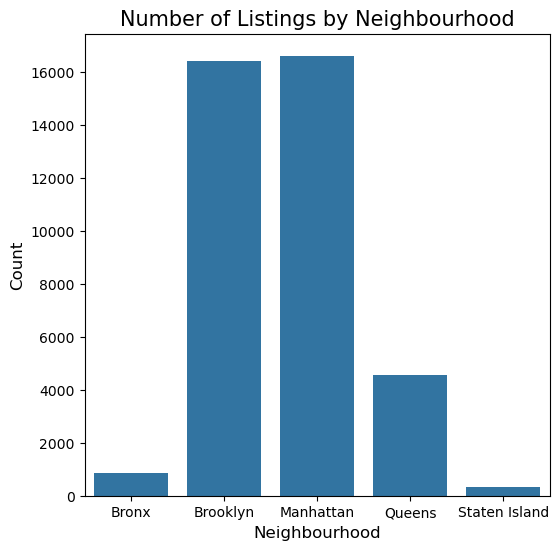

In [172]:
airbnb.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)
borough_count = airbnb.groupby('boroname').agg('count').reset_index()

#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='boroname', y='id', data=borough_count, ax=ax1)

ax1.set_title('Number of Listings by Neighbourhood', fontsize=15)
ax1.set_xlabel('Neighbourhood', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

I used geopandas to showcase which the number of listing for each borough within NYC, Queens and Manhattan shows the most of numbers of listing compared to other borough. See the map below for a better understanding.

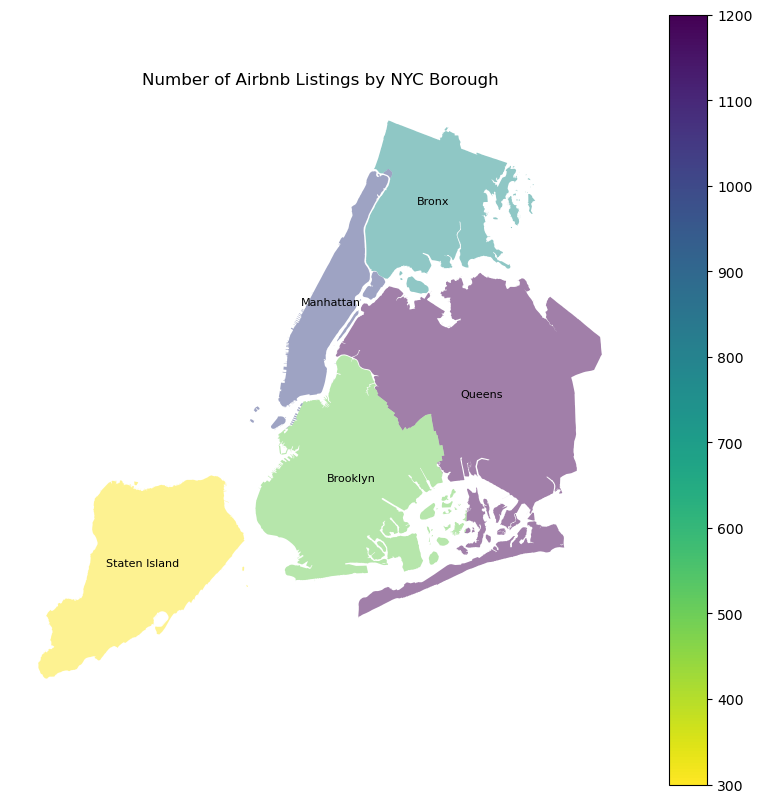

In [173]:
from geodatasets import get_path
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Get the path to the 'nybb' dataset
path_to_file = get_path('nybb')

# Load the data into a GeoDataFrame
nyc = gpd.read_file(path_to_file)

# Rename the column to match the desired format
nyc.rename(columns={'BoroName': 'boroname'}, inplace=True)

# Define the borough_count DataFrame (example data for Airbnb listings)
borough_count = pd.DataFrame({
    'boroname': ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
    'id': [1000, 750, 500, 1200, 300]  # Example Airbnb listing counts
})

# Merge the borough data with the count data
bc_geo = nyc.merge(borough_count, on='boroname')

# Plotting the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)

# Add borough names as annotations
bc_geo.apply(lambda x: ax.annotate(
    text=x.boroname,
    color='black',
    xy=x.geometry.centroid.coords[0],
    ha='center',
    fontsize=8),
    axis=1)

plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('off')
plt.show()



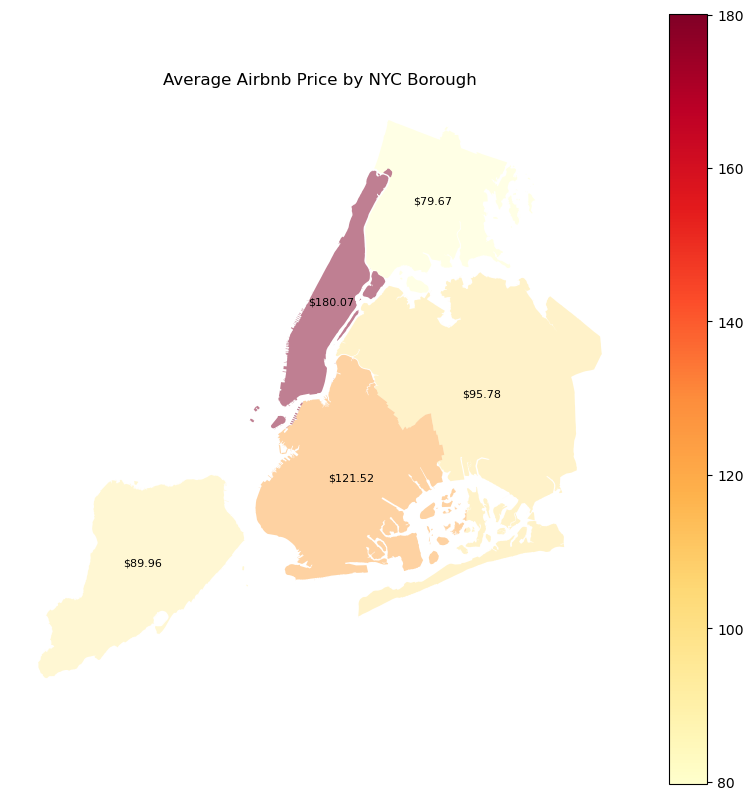

In [174]:
avg_price_by_borough = airbnb.groupby('boroname')['price'].mean().reset_index()
bc_geo_avg_price = nyc.merge(avg_price_by_borough, on='boroname')

# Plot the data with a valid colormap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo_avg_price.plot(column='price', cmap='YlOrRd', alpha=0.5, ax=ax, legend=True)

# Add borough names as annotations
bc_geo_avg_price.apply(lambda x: ax.annotate(
    text=f"${x.price:,.2f}",  # display average price with 2 decimal places
    color='black',
    xy=x.geometry.centroid.coords[0],
    ha='center',
    fontsize=8), axis=1)

plt.title("Average Airbnb Price by NYC Borough")
plt.axis('off')
plt.show()

## EDA Exploratory Data Analysis

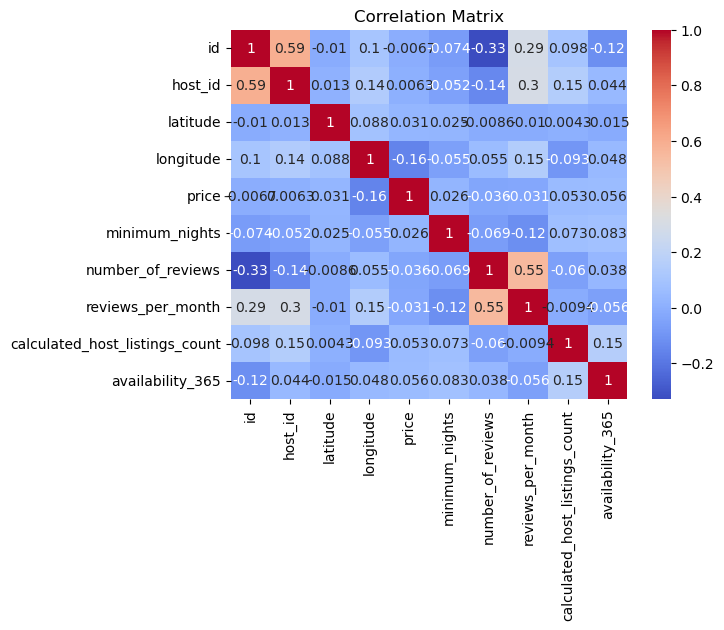

In [175]:
#Correlation Analysis(EDA)
numeric_data = airbnb.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [176]:
# Calculate the correlation matrix
numeric_data = airbnb.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Extract the correlations with 'price'
price_correlations = correlation_matrix['price']

# Print the correlations with price
print(price_correlations)

id                               -0.006666
host_id                           0.006261
latitude                          0.031298
longitude                        -0.155222
price                             1.000000
minimum_nights                    0.025517
number_of_reviews                -0.035904
reviews_per_month                -0.030596
calculated_host_listings_count    0.052895
availability_365                  0.056348
Name: price, dtype: float64


## Data Modeling

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [178]:
features = ['minimum_nights', 'number_of_reviews', 'latitude', 'longitude', 
            'availability_365', 'reviews_per_month', 'calculated_host_listings_count']
X = airbnb[features]

# Target variable
y = airbnb['price']

# Encoding categorical variables if needed (e.g., one-hot encoding for 'room_type')
# You can add more encoding as needed
X = pd.get_dummies(X, drop_first=True)

In [179]:
# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [180]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.04222166798531579
Mean Squared Error (MSE): 32038.80554302252
Root Mean Squared Error (RMSE): 178.99387012694743


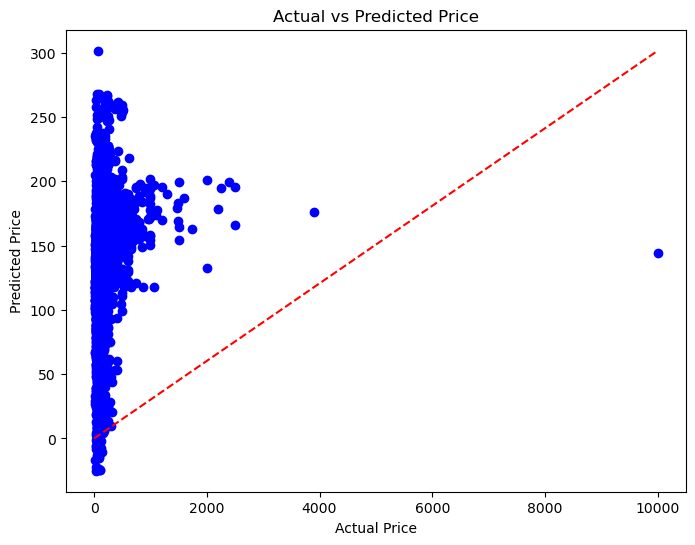

In [181]:
# Plot the Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', linestyle='--')
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


## Conclusion

Based on the results of the Multiple Linear Regression (MLR) model applied to the NYC Airbnb dataset, it is clear that the model has limited accuracy. The R-squared value of 0.0422 shows that only about 4.22% of the variation in Airbnb prices is explained by the features used in the model. This suggests that the chosen features don't fully capture the factors that affect prices in the NYC market. The Mean Squared Error (MSE) of 32038.81 and the Root Mean Squared Error (RMSE) of 178.99 indicate that the model's predictions are off by around $179 on average for each listing, which is a significant error. These results suggest that the model is missing important information, such as specific location details, changes in demand, and host-related factors. To improve the model, it would be helpful to add more relevant features and try more advanced machine learning methods to better capture the complexity of the Airbnb pricing system.